imports

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



loading the dataset

In [ ]:
file_path = 'heart.csv'
data = pd.read_csv(file_path)

understanding  the dataset

In [ ]:
data_info = data.info()

In [ ]:
data_shape=data.shape
data_shape

In [ ]:
data_head = data.head() 
data_head


In [ ]:
data_describe = data.describe()
data_describe

Filtering dataset

In [ ]:
# removing the id since it is not useful for our model 
data=data.drop(['id'],axis=1)
data_info = data.info()

In [ ]:
data.isnull()
data.isnull().sum()
msno.matrix(data)
plt.show()


handling missing values

In [ ]:
# taking the average which have more than 5 missing values
data['RestingBP']= data['RestingBP'].fillna(data['RestingBP'].mean())
data.isnull().sum()

In [ ]:
# drop rows with less then 5 missing values 
data=data.dropna()
data.isnull().sum()

handling duplicates

In [ ]:
data.duplicated().sum()


In [ ]:
data=data.drop_duplicates()
data.duplicated().sum()


changing text to integers

In [ ]:
data['Sex'].unique()

In [ ]:
data['Sex']=data['Sex'].replace(['M','F'],[1,2])

In [ ]:
data['ChestPainType'].unique()

In [ ]:
data['ChestPainType']=data['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'],[1,2,3,4])

In [ ]:
data['ExerciseAngina'].unique()

In [ ]:
data['ExerciseAngina']=data['ExerciseAngina'].replace(['N', 'Y'],[1,2])

In [ ]:
data['RestingECG'].unique()

In [ ]:
data['RestingECG']=data['RestingECG'].replace(['Normal', 'ST', 'LVH'],[1,2,3])

In [ ]:
data['ST_Slope'].unique()

In [ ]:
data['ST_Slope']=data['ST_Slope'].replace(['Up', 'Flat', 'Down'],[1,2,3])

Data visualization and relationship

In [ ]:
data['Age'].value_counts(normalize=True)

In [ ]:
data['Age'].value_counts().plot(kind='bar')

In [ ]:
data['Sex'].value_counts().plot(kind='bar')

In [ ]:
# Mean of HeartDisease grouped by Sex
data.groupby('Sex')["HeartDisease"].mean()

In [ ]:
# Mean of HeartDisease grouped by Age
data.groupby('Age')["HeartDisease"].mean()

In [ ]:
# Mean of HeartDisease grouped by Age
data.groupby('Age')["HeartDisease"].mean().plot(kind='bar')

In [ ]:
# Mean of HeartDisease grouped by ChestPainType
data.groupby('ChestPainType')["HeartDisease"].mean()

In [ ]:

# Mean of HeartDisease grouped by RestingBP
data.groupby('RestingBP')["HeartDisease"].mean()

In [ ]:
# Mean of HeartDisease grouped by Cholesterol
data.groupby('Cholesterol')["HeartDisease"].mean()

In [ ]:
# Mean of HeartDisease grouped by Cholesterol
data.groupby('Cholesterol')["HeartDisease"].mean().plot(kind='bar')
# sns.scatterplot(data=data,y="HeartDisease",x="Cholesterol")

In [ ]:
# Mean of HeartDisease grouped by FastingBS
data.groupby('FastingBS')["HeartDisease"].mean()

In [ ]:
# Mean of HeartDisease grouped by RestingECG
data.groupby('RestingECG')["HeartDisease"].mean()


In [ ]:


# Mean of HeartDisease grouped by MaxHR
data.groupby('MaxHR')["HeartDisease"].mean()

In [ ]:


# Mean of HeartDisease grouped by MaxHR
data.groupby('MaxHR')["HeartDisease"].mean().plot(kind='bar')

In [ ]:

# Mean of HeartDisease grouped by ExerciseAngina
data.groupby('ExerciseAngina')["HeartDisease"].mean()

In [ ]:

# Mean of HeartDisease grouped by Oldpeak
data.groupby('Oldpeak')["HeartDisease"].mean()



In [ ]:
data.groupby('Oldpeak')["HeartDisease"].mean().plot(kind='bar')

In [ ]:

# Mean of HeartDisease grouped by ST_Slope
data.groupby('ST_Slope')["HeartDisease"].mean()


In [ ]:
sns.scatterplot(data=data , y="RestingBP" ,x="Cholesterol",hue="HeartDisease")

exploratory data analysis

In [ ]:
data_catagorical=data.select_dtypes(include=['category'])
data_catagorical.info()

In [ ]:
data.nunique().sort_values()

In [ ]:
data_catagorical=data.nunique().reset_index()
data_catagorical

In [ ]:
data_catagorical.columns=['features','categories']
data_catagorical

In [ ]:
data_catagorical=data_catagorical.sort_values(by="categories")
data_catagorical=data_catagorical[data_catagorical.categories<5]
data_catagorical.features.values

In [ ]:
data_catagorical=data[data_catagorical.features.values]
data_catagorical

In [ ]:

plt.figure(figsize=(30,20))
for i in enumerate(data_catagorical.columns):
    plt.subplot(3,4,i[0]+1)
    sns.countplot(x=i[1],hue="HeartDisease",data=data_catagorical)

In [ ]:
data_continuous=data.select_dtypes(include=['float'])
data_continuous.info()

In [ ]:
sns.heatmap(data_continuous.corr())

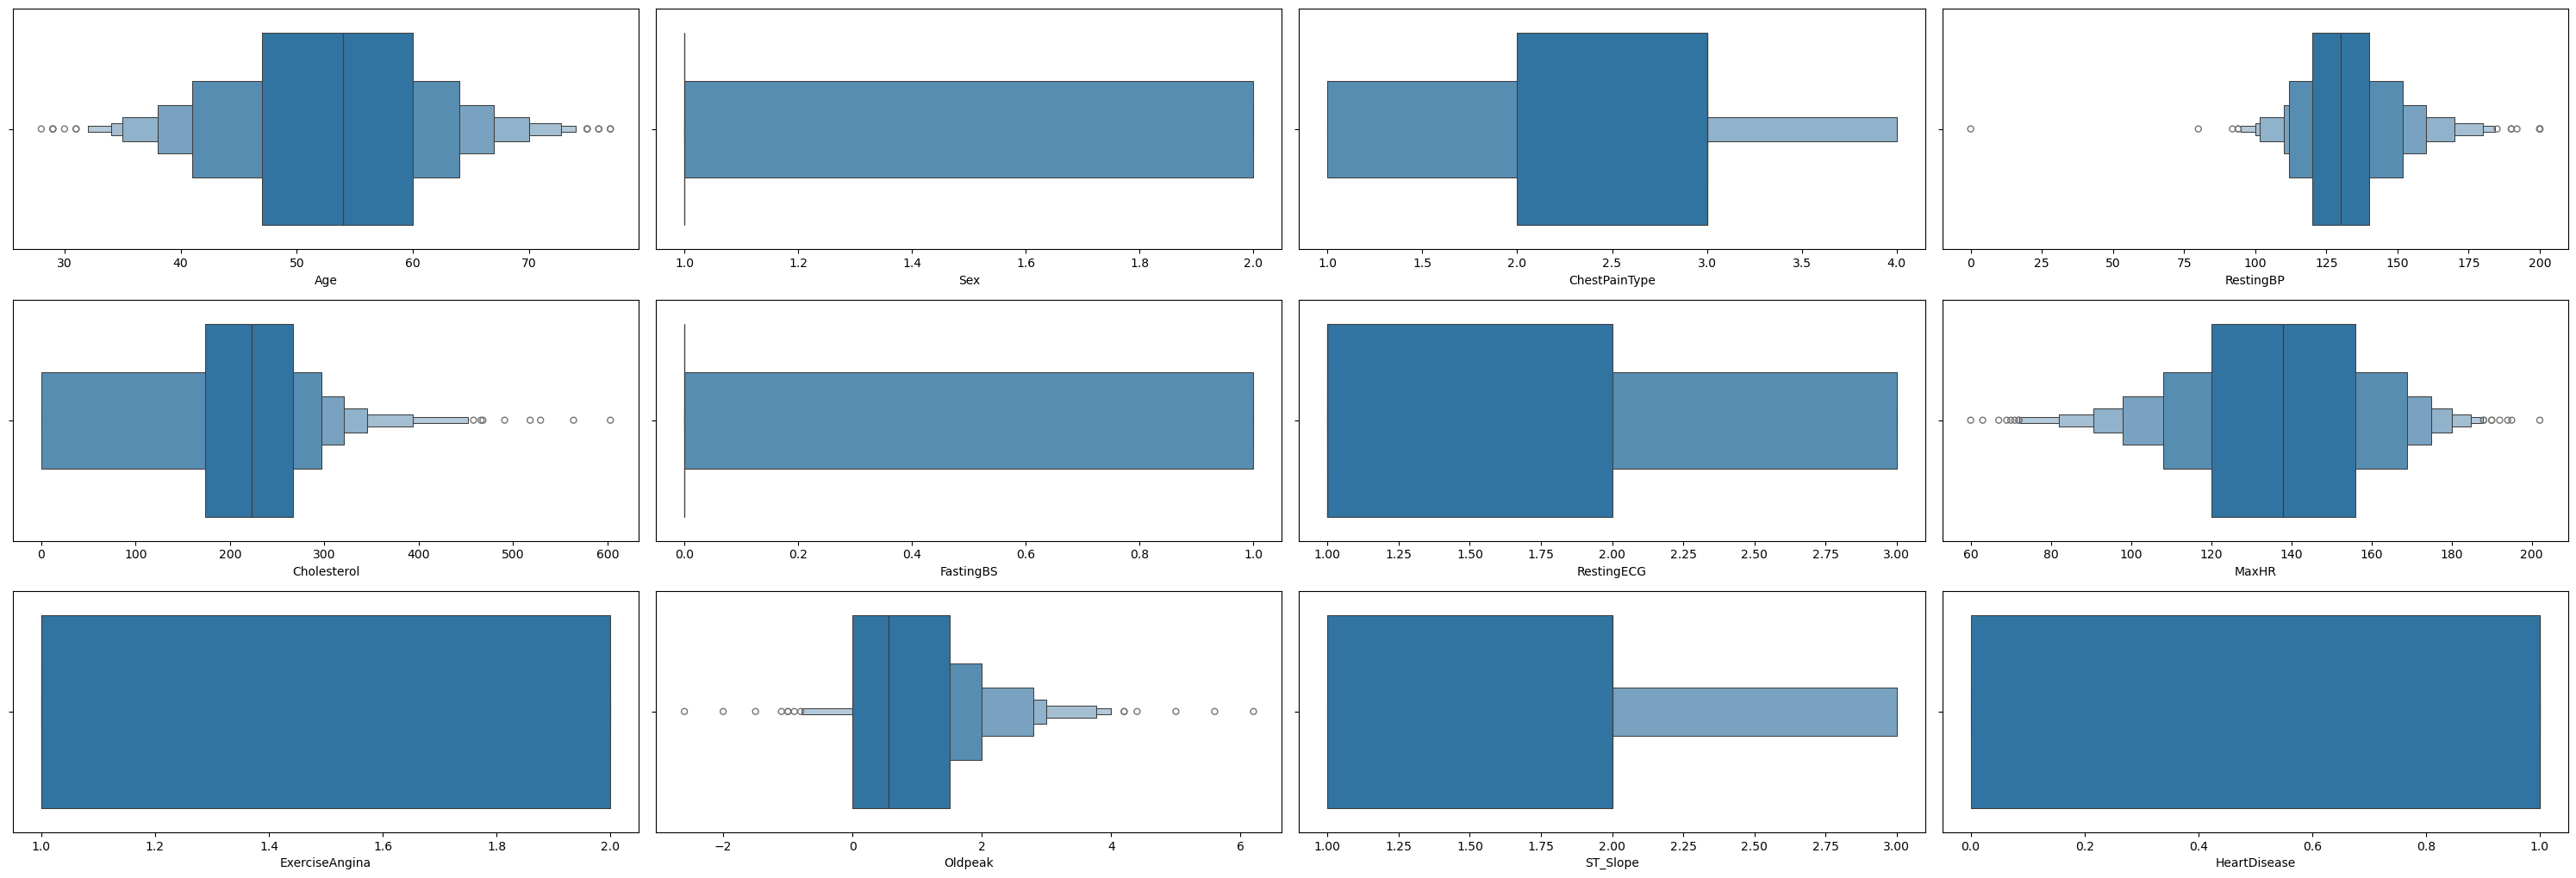

In [223]:
plt.figure(figsize=(30,20))
for i in enumerate(data.columns ):
    plt.subplot(6,4,i[0]+1)
    sns.boxenplot(x=i[1],data=data)
plt.tight_layout()